In this article , we will  develop a machine learning model using Python which will predict calories Burn by person during Workout based on some Biological Measures.

In [1]:
# importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")


Now let's load the datasets and Combine both dataset togethere

In [2]:
#read the dataset
df1=pd.read_csv("/content/calories burnt.csv")
df2=pd.read_csv("/content/exercise.csv")

#print the dataset
print(df1.head())
print(df2.head())
df=pd.merge(df1,df2,how='outer')
df

    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,female,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,female,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,female,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,female,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,male,23,169.0,73.0,25.0,102.0,40.7
...,...,...,...,...,...,...,...,...,...
14995,19999044,129.0,female,25,169.0,66.0,22.0,105.0,40.6
14996,19999086,42.0,female,31,170.0,69.0,9.0,93.0,39.8
14997,19999257,112.0,male,21,176.0,75.0,19.0,109.0,40.5
14998,19999394,42.0,female,36,152.0,54.0,10.0,86.0,39.7


In [3]:
#check for shape and size
print(df.shape)
print(df.size)

(15000, 9)
135000


In [4]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
# check for descriptive statistical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5


In [7]:
#check for null values
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


We can clearly see that there are no null values we have clean dataset.

# **Exploratory Data Analysis**

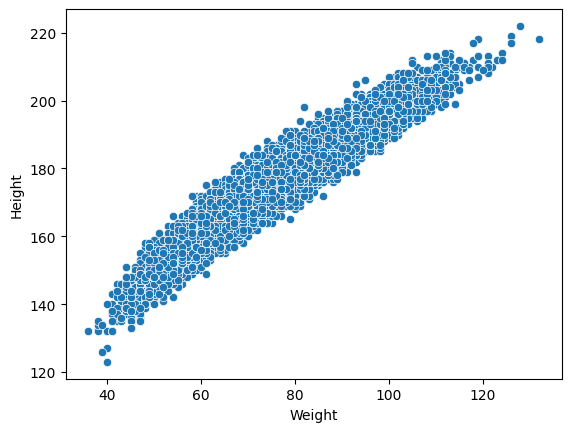

In [8]:
sns.scatterplot(y='Height',x='Weight',data=df)
plt.show()

We have a kind of linear relationship between these two feature which is quite obvious.

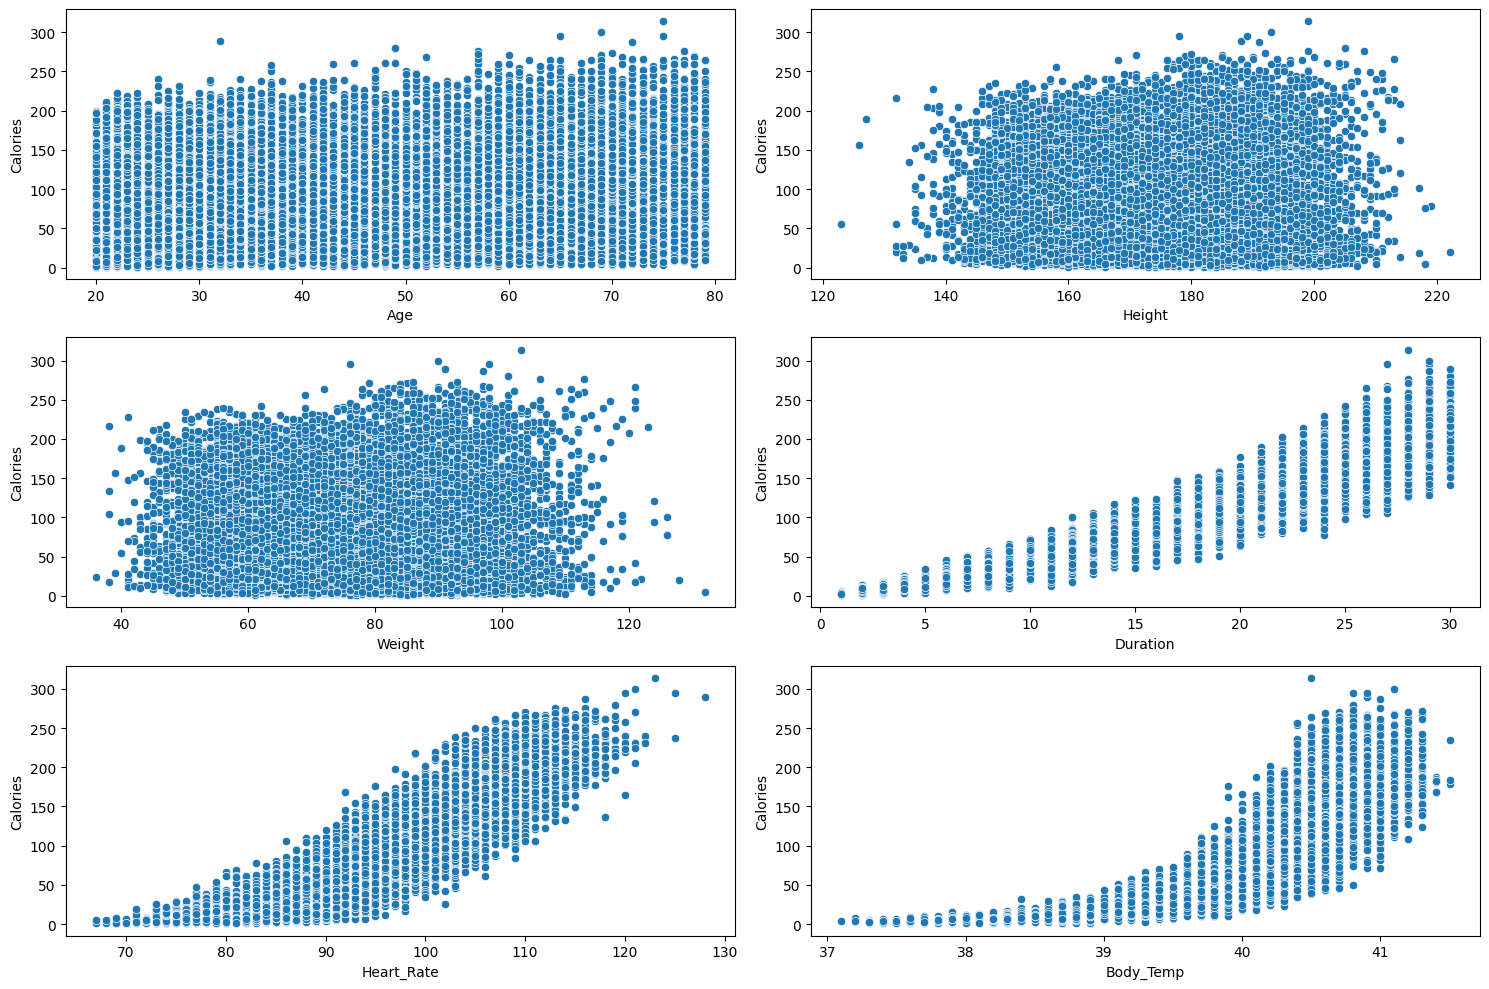

In [9]:
feature=['Age','Height','Weight','Duration','Heart_Rate','Body_Temp']

plt.figure(figsize=(15,10))
for i,col in enumerate(feature):
  plt.subplot(3,2,i+1)
  sns.scatterplot(x=col,y='Calories',data=df)
plt.tight_layout()
plt.show()


As expected higher is the duration of the workout higher will be the calorie burnt.similarly for Heart_Rate and Body_temp these were the observation between the feature and Calorie.

Here we can observe some real-life observation:


*   The average height of the boys is higher than girls.


*   Also, the weight of the girls is lower than that of the boys.

*   For the same average duration of workout calories burnt by men is higher than that of women.





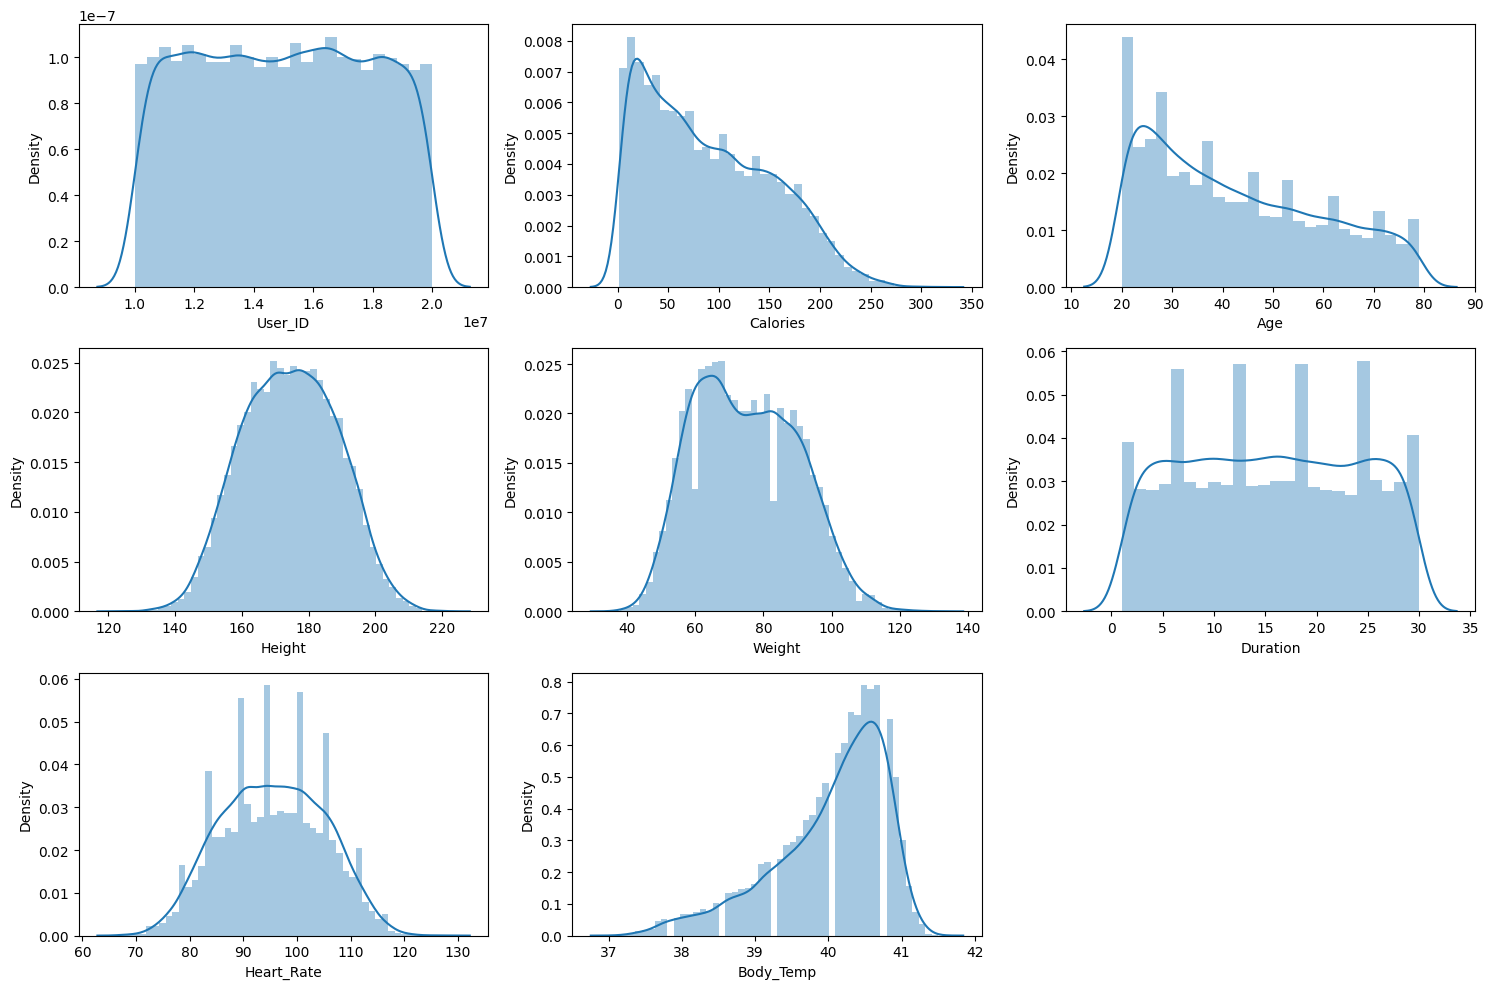

In [10]:
features=df.select_dtypes(include='number').columns.to_list()
# features
plt.figure(figsize=(15,10))
for i,col in enumerate(features):
  plt.subplot(3,3,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

The distribution of continous features are close to normal distribution except for some feature like Calories,Age,Body_temp.

In [11]:
#encoding the categorical features

# intialising the encoder
Le=LabelEncoder()
df["Gender"]=Le.fit_transform(df["Gender"])
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,10001159,76.0,0,67,176.0,74.0,12.0,103.0,39.6
1,10001607,93.0,0,34,178.0,79.0,19.0,96.0,40.6
2,10005485,49.0,0,38,178.0,77.0,14.0,82.0,40.5
3,10005630,36.0,0,39,169.0,66.0,8.0,90.0,39.6
4,10006441,122.0,1,23,169.0,73.0,25.0,102.0,40.7


In [12]:
pip install joblib

In [13]:
# Save encoder
import joblib
joblib.dump(Le, "label_encoder.pkl")

['label_encoder.pkl']

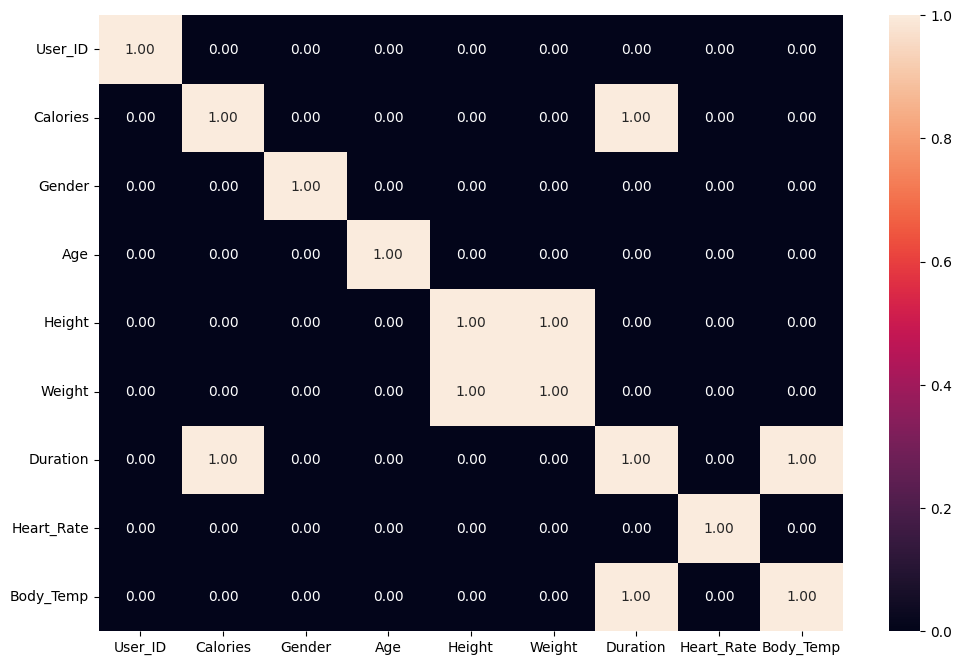

In [14]:
#check for correlation
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(numeric_only=True) > 0.9,annot=True,fmt='.2f')
plt.show()

we found that there is high correlation between features likes  Weight , Duration so we'll remove it .

In [15]:
#reducing multi-collinearity
df.drop(['Weight','Duration'],axis=1,inplace=True)

# **Feature Scaling**

In [16]:
x=df.drop(['Calories','User_ID'],axis=1) #feature
y=df['Calories'] #target

# splitting the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12000, 5), (3000, 5), (12000,), (3000,))

In [17]:
#standardising the values

# intialising the scaler
Sc=StandardScaler()

x_train=Sc.fit_transform(x_train)
x_test=Sc.transform(x_test)



In [18]:
# Save scaler
joblib.dump(Sc, "scaler.pkl")

['scaler.pkl']

# **Model Building and Evaluation**

In [19]:
from sklearn.metrics import mean_absolute_error as mae

# list of model
model= [LinearRegression(),SVC(),RandomForestRegressor(),XGBRegressor(),Lasso(),Ridge()]

for i in range(5):
  model[i].fit(x_train,y_train)

  print(f'{model[i]}')

  train_pred=model[i].predict(x_train)
  print("Training error",mae(train_pred,y_train))

  test_pred=model[i].predict(x_test)
  print("Testing error",mae(test_pred,y_test))
  print()



LinearRegression()
Training error 17.85273093142328
Testing error 18.19987377034297

SVC()
Training error 12.606333333333334
Testing error 13.250333333333334

RandomForestRegressor()
Training error 4.001536837301588
Testing error 10.686670404761905

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Tra

Out of all the above models, we have trained RandomForestRegressor and the XGB model's performance is the same as their MAE for the validation data is same.
we will go with RandomForestRegressor for depploying the final model.

In [20]:
# Save model
joblib.dump(model[2], "RFR_model.pkl")

['RFR_model.pkl']

# **Model Deployment**

In [21]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [22]:
# App file

code = '''

import streamlit as st
# import numpy as np
import joblib

# Load model and transformers
model = joblib.load("RFR_model.pkl")
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("label_encoder.pkl")

st.title("🔥 Calories Burnt Prediction App")
st.markdown("Enter your workout details below:")

# Input form
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.number_input("Age", 10, 80, 25)
height = st.number_input("Height (cm)", 100, 250, 170)
weight = st.number_input("Weight (kg)", 30, 200, 70)
duration = st.slider("Duration (minutes)", 0, 300, 60)
heart_rate = st.slider("Heart Rate (bpm)", 50, 200, 120)
body_temp = st.slider("Body Temperature (°C)", 35.0, 42.0, 37.0)

if st.button("Predict Calories Burnt"):
    # Process input
    gender_encoded = encoder.transform([gender])[0]
    input_data = np.array([[gender_encoded, age, height, weight, duration, heart_rate, body_temp]])
    input_scaled = scaler.transform(input_data)

    # Predict
    prediction = model.predict(input_scaled)[0]
    st.success(f"Estimated Calories Burnt: 🔥 **{prediction:.2f} kcal**")'''


with open("app.py", "w") as f:
    f.write(code)